<a href="https://colab.research.google.com/github/dTony33/Machine-Learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the given dataset**

In [2]:
import numpy as np
x_train = np.load('/content/drive/MyDrive/ML Datasets/x_train.npy')
x_test = np.load('/content/drive/MyDrive/ML Datasets/x_test.npy')
y_train = np.load('/content/drive/MyDrive/ML Datasets/y_train.npy')
y_test = np.load('/content/drive/MyDrive/ML Datasets/y_test.npy')


In [3]:
x_train.shape, y_train.shape

((100, 1), (100,))

**Since the shape of y_trainig is not as same as the x_training, I am changing the shape of the y as same as X**

In [4]:
y_train =y_train.reshape(100,1)

In [28]:
x_train.shape

(100, 1)

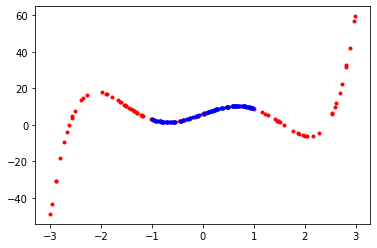

In [6]:
import matplotlib.pyplot as plt

plt.plot(x_train,y_train,'r.')
plt.plot(x_test,y_test,'b.')
plt.show()

# Linear Regression
**Preliminary Analysis**


By above plotting it is observed is data has some linearity between x and y values for both the datasets of training and testing. 

# Algorithm
**Since the data is very small, I am asuming we can achieve the linear equation usig gradient descent in no time with less number of iterations and less number of epochs.**

**So my approach is going to be Finding the predictions uing the Normal Equations**

****
**Finding Theta**
---
Equation for the normal equations is 

Theta = (X.T *X)-1 * X.T * y_hat


In [16]:
X_cap = np.append(x_train,np.ones((x_train.shape[0],1)),axis =1)

In [17]:
def theta(x,y):
  m,n = x.shape
  theta = np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))
  return theta

In [18]:
theta = theta(X_cap,y_train)
theta

array([[3.30656683],
       [6.19321416]])

In [10]:
def prediction(x_test, theta):
  x = np.append(x_test,np.ones((x_test.shape[0],1)),axis =1)
  predictions = np.dot(x,theta)
  return predictions


In [11]:
predicted_data = prediction(x_test,theta)

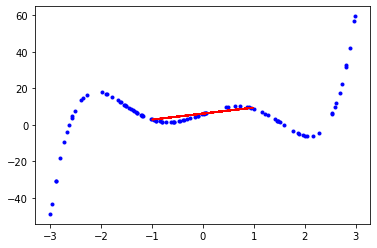

In [12]:
plt.plot(x_train,y_train,'b.')
plt.plot(x_test,predicted_data,'r-')
plt.show()


**Problem 3**
* Since we had to calculate weight for value and update using tau value *

**Need to change the architecture of theta to read the data at every point**

In [10]:
#Problem 3
def locally_weighted(x,y,local,tau):
  m,n = x.shape
  x_hat = np.append(x,np.ones(m).reshape(m,1),axis =1)
  local = np.array([local,1])
  w = np.mat(np.identity(m))
  for i in range(m):
    x = x_hat[i]
    d = (-2 * tau * tau)
    w[i,i] = np.exp(np.dot((x-local), (x-local).T)/d)
  updated_theta = np.linalg.pinv(x_hat.T*(w*x_hat))*(x_hat.T*(w*y))
  prediction = np.dot(local,updated_theta)
  return updated_theta, prediction



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


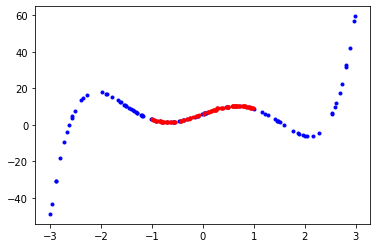

In [11]:
prediction_array = []
for local in x_test:
  theta_values, prediction = locally_weighted(x_train,y_train,local,0.01)
  prediction_array.append(prediction)
prediction_array = np.array(prediction_array).reshape(100,1)
plt.plot(x_train,y_train,'b.')
plt.plot(x_test,prediction_array,'r.')
plt.show()  

# House Prediction


In [13]:
import pandas as pd
df_data = pd.read_csv('/content/drive/MyDrive/ML Datasets/Assignment1_Q2_Data.csv')

In [31]:
house_x_train = df_data[['Local Price', 'Bathrooms', 'Living area', '# Rooms',]]
house_x_train = (house_x_train-house_x_train.mean())/house_x_train.std()
house_y_train = df_data[['Price (1000$)']]
house_y_train = house_y_train.to_numpy()
house_x_train = house_x_train.to_numpy()

In [32]:
house_y_train.shape

(28, 1)

In [33]:
m,n = house_x_train.shape
theta_house = np.dot(np.linalg.inv(np.dot(house_x_train.T,house_x_train)),np.dot(house_x_train.T,house_y_train))

In [34]:
theta_house

array([[ 5.77857712],
       [ 3.40625016],
       [ 5.84386186],
       [-0.82966945]])

In [38]:
# x_house = np.append(house_x_train,np.ones((house_x_train.shape[0],1)),axis =1)
predictions_house = np.dot(house_x_train,theta_house)

In [48]:
np.average(theta_house)

3.549754925776483

# Answers for the question


1.   
a.
Yes, the relation is linear and 
converged with theta
2.b: Since we got different theta value which is considered as mean squared errors, we can add some non linearity which will be helped in reducing the mean value.
This can be done by one the example, closed form normal equation



2.1:
average least squares of the housing problem i got is 3.549 



2.2: when plotted the correlation i can see that number of rooms and area has most effect on the final value. That's the reason i used those values in predicting the prices. We can also use bathrooms and price of the area

2.3: age of the house has no effect on the data. there wont be any effect if we remove this data

3.1: yes we need basis function in this problem. Which is updated for every point of the data
3.2: In Normal linear regression, weights act as a cummulative weights for the entire dataset. Where as in Locally weighted Linear regression weights change for the every point of the data point in the dataset